In [1]:
!pip install pandas_datareader


In [2]:
import pandas_datareader as pdr
key=""
ticker='AMZN'

In [3]:
df = pdr.get_data_tiingo(ticker, api_key=key)

D:\python\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [4]:
filename=ticker+'.csv'
df.to_csv(filename)


In [5]:
import pandas as pd

In [6]:
df=pd.read_csv(filename)

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AMZN,2019-01-08 00:00:00+00:00,1656.58,1676.61,1616.61,1664.69,8881428,82.8290,83.8305,80.8305,83.2345,177628560,0.0,1.0
1,AMZN,2019-01-09 00:00:00+00:00,1659.42,1667.80,1641.40,1652.98,6348801,82.9710,83.3900,82.0700,82.6490,126976020,0.0,1.0
2,AMZN,2019-01-10 00:00:00+00:00,1656.22,1663.25,1621.62,1641.01,6507693,82.8110,83.1625,81.0810,82.0505,130153860,0.0,1.0
3,AMZN,2019-01-11 00:00:00+00:00,1640.56,1660.29,1636.22,1640.55,4686222,82.0280,83.0145,81.8110,82.0275,93724440,0.0,1.0
4,AMZN,2019-01-14 00:00:00+00:00,1617.21,1648.20,1595.15,1615.00,6005888,80.8605,82.4100,79.7575,80.7500,120117760,0.0,1.0


In [8]:
df1=df.reset_index()['adjClose']

In [9]:
df1

0        82.8290
1        82.9710
2        82.8110
3        82.0280
4        80.8605
          ...   
1253    151.9400
1254    149.9300
1255    148.4700
1256    144.5700
1257    145.2400
Name: adjClose, Length: 1258, dtype: float64

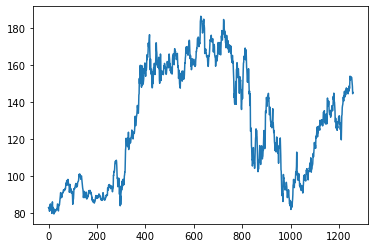

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1

array([[0.03189638],
       [0.03322151],
       [0.0317284 ],
       ...,
       [0.64445056],
       [0.60805622],
       [0.61430858]])

In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(817, 441)

In [16]:
train_data


array([[0.03189638],
       [0.03322151],
       [0.0317284 ],
       [0.02442154],
       [0.01352657],
       [0.04028574],
       [0.04458774],
       [0.04899239],
       [0.05038284],
       [0.02050681],
       [0.02416958],
       [0.0311265 ],
       [0.03842403],
       [0.02317573],
       [0.00264092],
       [0.03835871],
       [0.06089521],
       [0.01773525],
       [0.02103873],
       [0.03293688],
       [0.02428156],
       [0.01220144],
       [0.        ],
       [0.00129713],
       [0.02323172],
       [0.02416025],
       [0.01606484],
       [0.0092059 ],
       [0.01836515],
       [0.01580821],
       [0.01456707],
       [0.02022219],
       [0.02089409],
       [0.02248051],
       [0.02466883],
       [0.02408093],
       [0.03896528],
       [0.05036884],
       [0.04862378],
       [0.03766815],
       [0.0176046 ],
       [0.01520164],
       [0.03844736],
       [0.03960451],
       [0.0478679 ],
       [0.04572623],
       [0.057923  ],
       [0.071

In [17]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)



In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 51s 1s/step - loss: 0.1855 - val_loss: 0.0327
Epoch 2/100
12/12 [==============================] - 7s 588ms/step - loss: 0.0189 - val_loss: 0.0131
Epoch 3/100
12/12 [==============================] - 7s 550ms/step - loss: 0.0093 - val_loss: 0.0059
Epoch 4/100
12/12 [==============================] - 6s 495ms/step - loss: 0.0059 - val_loss: 0.0059
Epoch 5/100
12/12 [==============================] - 6s 534ms/step - loss: 0.0048 - val_loss: 0.0061
Epoch 6/100
12/12 [==============================] - 6s 507ms/step - loss: 0.0048 - val_loss: 0.0052
Epoch 7/100
12/12 [==============================] - 6s 496ms/step - loss: 0.0043 - val_loss: 0.0050
Epoch 8/100
12/12 [==============================] - 7s 557ms/step - loss: 0.0043 - val_loss: 0.0053
Epoch 9/100
12/12 [==============================] - 6s 471ms/step - loss: 0.0043 - val_loss: 0.0051
Epoch 10/100
12/12 [==============================] - 6s 534ms/step - loss: 0.0045 - val_loss

12/12 [==============================] - 6s 497ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 82/100
12/12 [==============================] - 6s 472ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 83/100
12/12 [==============================] - 6s 481ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 84/100
12/12 [==============================] - 5s 420ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 85/100
12/12 [==============================] - 6s 510ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 86/100
12/12 [==============================] - 6s 504ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 87/100
12/12 [==============================] - 7s 601ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 88/100
12/12 [==============================] - 8s 642ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 89/100
12/12 [==============================] - 7s 565ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 90/100
12/12 [==============================] - 8s 647ms/step - loss: 0.0013 - val_loss: 

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.11.0'

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 82ms/step


In [29]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.48064692892277

In [31]:
math.sqrt(mean_squared_error(ytest,test_predict))

120.54568682902685

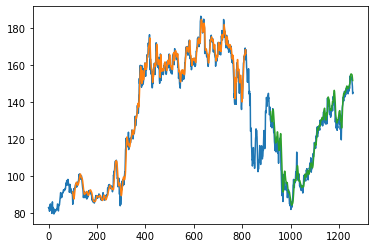

In [32]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

441

In [34]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 101)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.5707286801450174,
 0.5436662171809311,
 0.5194033193510607,
 0.5092315660300765,
 0.5021393343567299,
 0.5157638846765803,
 0.5117511746508708,
 0.5236026670523845,
 0.4892613347393372,
 0.5025126097079585,
 0.5013927836542721,
 0.5179102179461456,
 0.5194033193510607,
 0.5468390576663756,
 0.5478655648822549,
 0.5399334636686436,
 0.5221095656474696,
 0.5453459562614605,
 0.548892072098134,
 0.5943383461102375,
 0.5768877234402922,
 0.6106691427264964,
 0.6094559978350028,
 0.5690489410644878,
 0.5652228687143929,
 0.5432929418297024,
 0.521456333782819,
 0.46583830644973145,
 0.4638786108557803,
 0.4839421609843272,
 0.43457649578432156,
 0.43457649578432156,
 0.43457649578432156,
 0.4452148432943416,
 0.46705145134122505,
 0.4228183222206149,
 0.44409501724065514,
 0.434389858108707,
 0.45305362567014573,
 0.4558531908043616,
 0.46723808901683916,
 0.48916801590153003,
 0.49383395779188966,
 0.4701309729888622,
 0.49588697222364797,
 0.48580853774047095,
 0.454640045912868,
 0.45

In [36]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.54366622 0.51940332 0.50923157 0.50213933 0.51576388 0.51175117
 0.52360267 0.48926133 0.50251261 0.50139278 0.51791022 0.51940332
 0.54683906 0.54786556 0.53993346 0.52210957 0.54534596 0.54889207
 0.59433835 0.57688772 0.61066914 0.609456   0.56904894 0.56522287
 0.54329294 0.52145633 0.46583831 0.46387861 0.48394216 0.4345765
 0.4345765  0.4345765  0.44521484 0.46705145 0.42281832 0.44409502
 0.43438986 0.45305363 0.45585319 0.46723809 0.48916802 0.49383396
 0.47013097 0.49588697 0.48580854 0.45464005 0.45715965 0.42701767
 0.43998899 0.45865276 0.39174315 0.37475912 0.45100061 0.49738007
 0.50092619 0.53741386 0.54739897 0.55234487 0.56298322 0.59069891
 0.58481982 0.57100864 0.59863101 0.58957909 0.61953443 0.59527153
 0.59181874 0.61374866 0.62261395 0.60180385 0.62802645 0.6283064
 0.63754497 0.63101265 0.62438701 0.62224068 0.63101265 0.61057582
 0.62961287 0.60758962 0.62961287 0.63465208 0.6203743  0.635212
 0.64790336 0.63465208 0.65844839 0.69670911 0.6940961

7 day output [[0.69854367]]
8 day input [0.50251261 0.50139278 0.51791022 0.51940332 0.54683906 0.54786556
 0.53993346 0.52210957 0.54534596 0.54889207 0.59433835 0.57688772
 0.61066914 0.609456   0.56904894 0.56522287 0.54329294 0.52145633
 0.46583831 0.46387861 0.48394216 0.4345765  0.4345765  0.4345765
 0.44521484 0.46705145 0.42281832 0.44409502 0.43438986 0.45305363
 0.45585319 0.46723809 0.48916802 0.49383396 0.47013097 0.49588697
 0.48580854 0.45464005 0.45715965 0.42701767 0.43998899 0.45865276
 0.39174315 0.37475912 0.45100061 0.49738007 0.50092619 0.53741386
 0.54739897 0.55234487 0.56298322 0.59069891 0.58481982 0.57100864
 0.59863101 0.58957909 0.61953443 0.59527153 0.59181874 0.61374866
 0.62261395 0.60180385 0.62802645 0.6283064  0.63754497 0.63101265
 0.62438701 0.62224068 0.63101265 0.61057582 0.62961287 0.60758962
 0.62961287 0.63465208 0.6203743  0.635212   0.64790336 0.63465208
 0.65844839 0.69670911 0.69409618 0.67851194 0.69456278 0.69064339
 0.69055007 0.68989684 

15 day output [[0.7653814]]
16 day input [0.54534596 0.54889207 0.59433835 0.57688772 0.61066914 0.609456
 0.56904894 0.56522287 0.54329294 0.52145633 0.46583831 0.46387861
 0.48394216 0.4345765  0.4345765  0.4345765  0.44521484 0.46705145
 0.42281832 0.44409502 0.43438986 0.45305363 0.45585319 0.46723809
 0.48916802 0.49383396 0.47013097 0.49588697 0.48580854 0.45464005
 0.45715965 0.42701767 0.43998899 0.45865276 0.39174315 0.37475912
 0.45100061 0.49738007 0.50092619 0.53741386 0.54739897 0.55234487
 0.56298322 0.59069891 0.58481982 0.57100864 0.59863101 0.58957909
 0.61953443 0.59527153 0.59181874 0.61374866 0.62261395 0.60180385
 0.62802645 0.6283064  0.63754497 0.63101265 0.62438701 0.62224068
 0.63101265 0.61057582 0.62961287 0.60758962 0.62961287 0.63465208
 0.6203743  0.635212   0.64790336 0.63465208 0.65844839 0.69670911
 0.69409618 0.67851194 0.69456278 0.69064339 0.69055007 0.68989684
 0.69027011 0.6768322  0.65807511 0.64445056 0.60805622 0.61430858
 0.63735414 0.63780016 

23 day output [[0.80365735]]
24 day input [0.54329294 0.52145633 0.46583831 0.46387861 0.48394216 0.4345765
 0.4345765  0.4345765  0.44521484 0.46705145 0.42281832 0.44409502
 0.43438986 0.45305363 0.45585319 0.46723809 0.48916802 0.49383396
 0.47013097 0.49588697 0.48580854 0.45464005 0.45715965 0.42701767
 0.43998899 0.45865276 0.39174315 0.37475912 0.45100061 0.49738007
 0.50092619 0.53741386 0.54739897 0.55234487 0.56298322 0.59069891
 0.58481982 0.57100864 0.59863101 0.58957909 0.61953443 0.59527153
 0.59181874 0.61374866 0.62261395 0.60180385 0.62802645 0.6283064
 0.63754497 0.63101265 0.62438701 0.62224068 0.63101265 0.61057582
 0.62961287 0.60758962 0.62961287 0.63465208 0.6203743  0.635212
 0.64790336 0.63465208 0.65844839 0.69670911 0.69409618 0.67851194
 0.69456278 0.69064339 0.69055007 0.68989684 0.69027011 0.6768322
 0.65807511 0.64445056 0.60805622 0.61430858 0.63735414 0.63780016
 0.64535826 0.65525168 0.66592038 0.67686683 0.68781525 0.69854367
 0.70887941 0.71870333 0.

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
len(df1)

1258

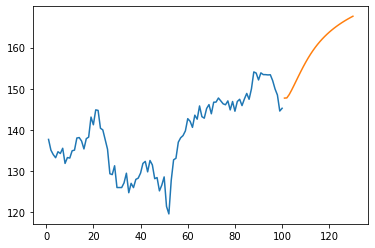

In [39]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [40]:
print(df1[1158:].flatten())
print(day_new)
print(np.array(lst_output).flatten())
print(day_pred)

[0.54366622 0.51940332 0.50923157 0.50213933 0.51576388 0.51175117
 0.52360267 0.48926133 0.50251261 0.50139278 0.51791022 0.51940332
 0.54683906 0.54786556 0.53993346 0.52210957 0.54534596 0.54889207
 0.59433835 0.57688772 0.61066914 0.609456   0.56904894 0.56522287
 0.54329294 0.52145633 0.46583831 0.46387861 0.48394216 0.4345765
 0.4345765  0.4345765  0.44521484 0.46705145 0.42281832 0.44409502
 0.43438986 0.45305363 0.45585319 0.46723809 0.48916802 0.49383396
 0.47013097 0.49588697 0.48580854 0.45464005 0.45715965 0.42701767
 0.43998899 0.45865276 0.39174315 0.37475912 0.45100061 0.49738007
 0.50092619 0.53741386 0.54739897 0.55234487 0.56298322 0.59069891
 0.58481982 0.57100864 0.59863101 0.58957909 0.61953443 0.59527153
 0.59181874 0.61374866 0.62261395 0.60180385 0.62802645 0.6283064
 0.63754497 0.63101265 0.62438701 0.62224068 0.63101265 0.61057582
 0.62961287 0.60758962 0.62961287 0.63465208 0.6203743  0.635212
 0.64790336 0.63465208 0.65844839 0.69670911 0.69409618 0.67851194

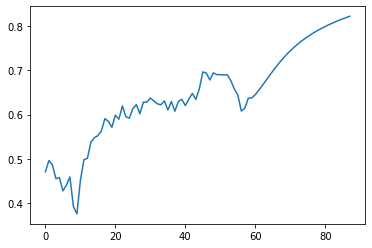

In [41]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [42]:
df3=scaler.inverse_transform(df3).tolist()

In [43]:
data=pd.DataFrame(np.array(df3[1200:])).to_csv("data.csv")

In [44]:
df=pd.read_csv("data.csv")

In [45]:
df.to_json(orient='values')

'[[0,129.79],[1,132.55],[2,131.47],[3,128.13],[4,128.4],[5,125.17],[6,126.56],[7,128.56],[8,121.39],[9,119.57],[10,127.74],[11,132.71],[12,133.09],[13,137.0],[14,138.07],[15,138.6],[16,139.74],[17,142.71],[18,142.08],[19,140.6],[20,143.56],[21,142.59],[22,145.8],[23,143.2],[24,142.83],[25,145.18],[26,146.13],[27,143.9],[28,146.71],[29,146.74],[30,147.73],[31,147.03],[32,146.32],[33,146.09],[34,147.03],[35,144.84],[36,146.88],[37,144.52],[38,146.88],[39,147.42],[40,145.89],[41,147.48],[42,148.84],[43,147.42],[44,149.97],[45,154.07],[46,153.79],[47,152.12],[48,153.84],[49,153.42],[50,153.41],[51,153.34],[52,153.38],[53,151.94],[54,149.93],[55,148.47],[56,144.57],[57,145.24],[58,147.7095504845],[59,147.7573459316],[60,148.5672689389],[61,149.6274425963],[62,150.7706946153],[63,151.9437110046],[64,153.1169381716],[65,154.2665901689],[66,155.3741632667],[67,156.4268894443],[68,157.4174106429],[69,158.3427568125],[70,159.2033175726],[71,160.0016669665],[72,160.7419566766],[73,161.428887685],

In [46]:
df3=scaler.inverse_transform(df3).tolist()

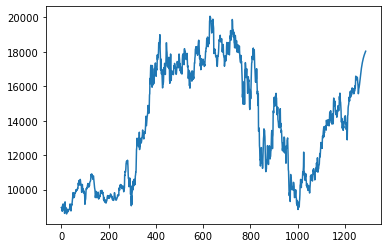

In [47]:
plt.plot(df3)